   Neural Networks
   - Neural networks consist of the following:
       - input layer, x
       - arbitrary amount of hidden layers
       - output layer, y
       - set of weights and biases between each layer, W and b
       - choice of activation function for each hidden layer

In [27]:
import numpy as np

The right values of weights and its biases determine the strength of the prediction
- fine-tuning the weights and biases using input data is called 'training the NN'

Terminology:
- Feedforward: calculating predicted output
- Backpropogation: updating the weights and biases to get better output
- Loss Function: dictates how good are our predictions (how far off they are)
    - many loss functions available depending on the nature of the problem
    - sum of squares: sum difference between predicted and actual value, later squared to receive an absolute value of the difference



Goal: Training the model to find the best set of weights and biases that minimizes (gives lowest value) the loss function.


Back propogation:
- To know how big of a step (or big of a change) to adjust the weights and biases by, we need to know the derivative of the loss function with respects to W's and b's. (Derivative gives us rate of change)
    - Gradient(derivative of loss function graph): gives us direction to move towards minima
    - Value of loss function: gives us goodnes of set of weights
    - Weights: what we need to find that will give us the lowest value of loss
    
    
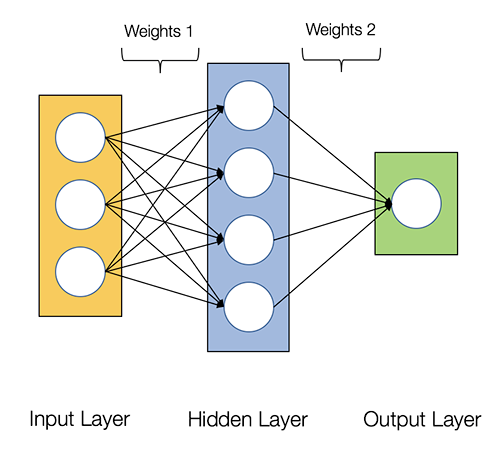




 
 To get the rate of change of gradient descent or how big/small amount of value will change.
 (Sigmoid function squashes the output value to be between 0-1, many other activation functions)
    

In [42]:
#Helper methods for math

#Sigmoid function formula
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

#Sigmoid derivative function formula
def sigmoid_derivative(x):
    return x * (1.0 - x)


In [29]:
#Neural network class
class NeuralNetwork:
    def __init__(self, x, y):
        self.input = x
        self.weights1 = np.random.rand(self.input.shape[1], 4)
        self.weights2 = np.random.rand(4,1)
        self.y = y
        self.output = np.zeros(y.shape)
        
    #Feedforward function
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))
        
    #Backpropogation function
    def backprop(self):
        
        #Application of the chain rule to find derivatives of the loss fucntion with respect w1 and w2
        #Funky math we can discuss later if curious
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))
        
        #Update the weights with the derivative(slope) of the loss functions
        self.weights1 += d_weights1  #current value  + rate of change(decimal)
        self.weights2 += d_weights2   #current value  + rate of change(decimal)
        
        

Training our Neural Network

We will give our NN this table with an unknown function

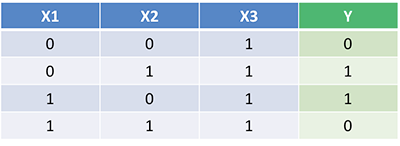

Looking at the first row for an example:
- All we know is that input (0,0,1) while output 1; and so on...
- NN will help us abstract and guess the function of this table to generalize other future info



In [36]:
#Feeding in our table for training

#Data (X) in NumPy syntax/formatting
X = np.array([[0,0,0],
             [0,0,1],
             [0,1,1]])

#Output (y) expected
y = np.array([[0],[0],[1]])

#Create an instance of the NN
nn = NeuralNetwork(X,y)


#Train the model
#Training for 1500 episodes/runs
for i in range(1500):
    nn.feedforward()
    nn.backprop()
    
print(nn.output)

[[0.02181747]
 [0.00903893]
 [0.98002137]]


In [38]:
#Test
X_test = np.array([[0,1,1]])
# y_test = np.array([[1]])

#Create a test instance Neural Network
nn_test = NeuralNetwork(X_test,_)

#Create the prediction
print(nn_test.y)


[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


Keras: NN and Deep-Learning Framework
        - Let's try this using a framework that makes these larger NN

In [44]:
#Sequential model: sequential layers (linear stack of layers)
from keras.models import Sequential
#Dense layer: layer where every input node connects to the output node
#Used to change dimensionality between input and output
from keras.layers import Dense
from keras import optimizers
np.random.seed(9)

In [51]:
#Creating a Sequential model
model = Sequential()

#Building the first layer
model.add(Dense(units=4, activation='sigmoid', input_dim=3))

#Output layer
model.add(Dense(units=1, activation='sigmoid'))

#Optimizer, we can go into this later
sgd = optimizers.SGD(lr=1)
model.compile(loss='mean_squared_error', optimizer=sgd)

#The data we will be fitting into this NN is the same as above
#Training data
X = np.array([[0,0,0],
             [0,0,1],
             [0,1,0],
             [0,1,1],
             [1,0,0],
             [1,0,1],
             [1,1,0]])
y = np.array([[0],[0],[0],[1],[0],[1],[1]])

#Fitting the model with the data
model.fit(X,y, epochs=1500, verbose=False)



In [52]:
#Prediction using the trained model
X_test = np.array([[1,1,1]]) 

print(model.predict(X_test))

[[0.9969222]]


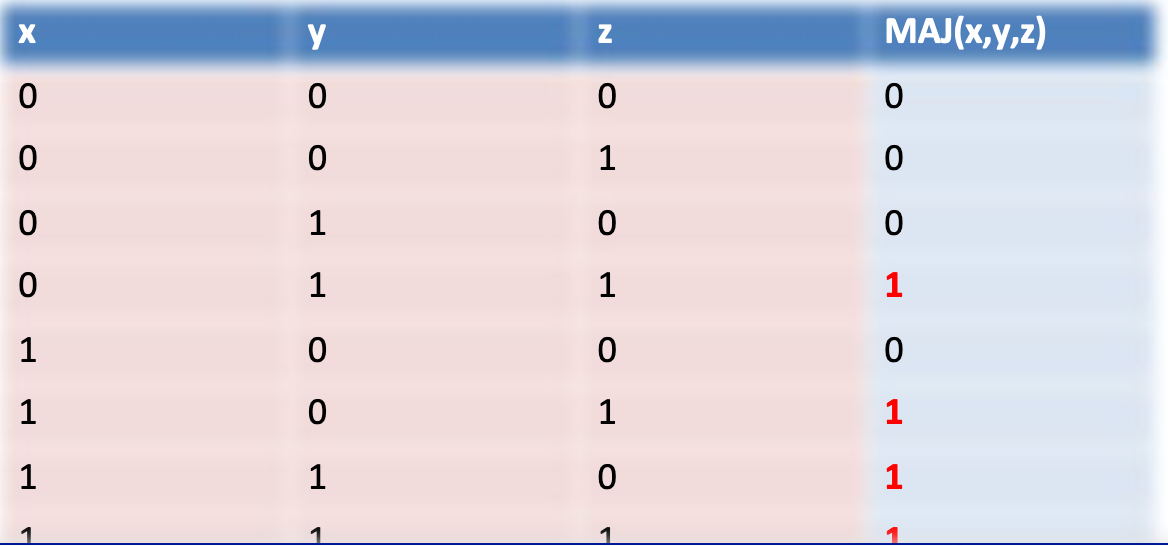